In [1]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.metrics import mean_squared_error

import numpy as np
import matplotlib.pyplot as plt

В задаче необходимо по верхней части лица восстановить нижнюю половину

In [2]:
# Загружаем наборы данных
data = fetch_olivetti_faces(random_state=18)
targets = data.target

data = data.images.reshape((len(data.images), -1))
train = data[targets < 30]
test = data[targets >= 30]

In [4]:
# Посмотрим на размеры выборок:
train.shape, test.shape

((300, 4096), (100, 4096))

In [4]:
n_pixels = data.shape[1]
# Верхняя половина лиц
X_train = train[:, :(n_pixels + 1) // 2]
X_test = test[:, :(n_pixels + 1) // 2]


# Нижняя половина лиц
y_train = train[:, n_pixels // 2:]
y_test = test[:, n_pixels // 2:]

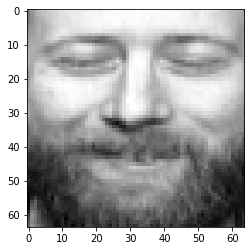

In [5]:
# Нарисуем случайное лицо: 
n = np.random.randint(300)
view = np.hstack((X_train[n], y_train[n]))
plt.imshow(view.reshape(64,64), cmap='gray')
plt.show()

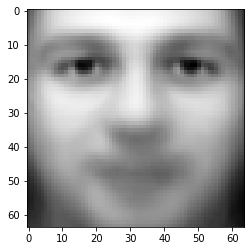

In [6]:
# Нарисуем Среднее лицо (Не забывайте использовать параметр axis в применении np.mean): 
mean_top = #ваш код здесь
mean_bottom = #ваш код здесь

view = np.hstack((mean_top, mean_bottom ))
plt.imshow(view.reshape(64,64), cmap='gray')
plt.show()

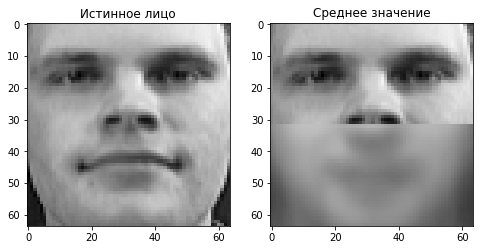

In [7]:
# Нарисуем случайную половину верха лица из теста и дополним его средним значением: 

n = np.random.randint(100)

fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(8, 4)
)


view = np.hstack((X_test[n], y_test[n]))
ax1.imshow(view.reshape(64,64), cmap='gray')
ax1.set_title("Истинное лицо")

view = np.hstack((X_test[n], mean_bottom))
ax2.imshow(view.reshape(64,64), cmap='gray')
ax2.set_title('Среднее значение')


plt.show()

Перезапустите несколько раз ячейку сверху, на сколько "среднее" лицо похоже на правду?  

## Задание 1: 
Давайте посчитаем ошибку mean_squared_error на тесте, если отвечать всегда средним лицом (mean_bottom) полученном на трейне? 

In [8]:
mean_bottom_repeat = []
#ваш код здесь


mean_squared_error(y_test, mean_bottom_repeat)

0.024881387

## Задание 2

Мы решаем задачу регрессии: Нам нужно восстановить 2048 (нижняя половина) чисел. 
Воспользуемся для этого методом ближайших соседей

In [9]:
from sklearn.neighbors import KNeighborsRegressor

In [10]:
knn = #ваш код здесь
#ваш код здесь
pred = #ваш код здесь

Сравним, насколько лучше выглядит "востановленное" лицо 

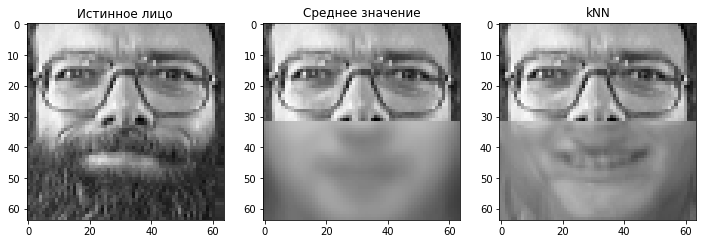

In [11]:
# Нарисуем случайную половину верха лица из теста и дополним его средним значением: 

n = np.random.randint(100)

fig, (ax1, ax2, ax3) = plt.subplots(
    nrows=1, ncols=3,
    figsize=(12, 4)
)


view = np.hstack((X_test[n], y_test[n]))
ax1.imshow(view.reshape(64,64), cmap='gray')
ax1.set_title("Истинное лицо")

view = np.hstack((X_test[n], mean_bottom))
ax2.imshow(view.reshape(64,64), cmap='gray')
ax2.set_title('Среднее значение')

view = np.hstack((X_test[n], pred[n]))
ax3.imshow(view.reshape(64,64), cmap='gray')
ax3.set_title('kNN')

plt.show()

Посчитаем ошибку mean_squared_error на тесте, для kNN обученного по умолчанию. 

In [12]:
mean_squared_error(y_test, pred)

0.021184199

# Задание 3
Найдите оптимальное (Где достигается минимум mean_squared_error) значение ближайщих соседей. 

29


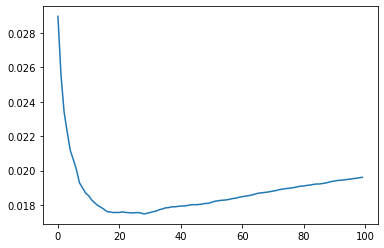

In [13]:
list_mse = []
mse = 100
optim_neighbors = 0
for i in range(20):
    #ваш код здесь

print(optim_neighbors)
plt.plot(range(100), list_mse)
plt.show()

# Задание 4 - просто ознакомиться
Обучим дерево с параметрами по умолчанию, однако зафиксируйте random_state =18:

In [14]:
from sklearn.tree import DecisionTreeRegressor

In [15]:
tree = DecisionTreeRegressor(random_state=18)
tree.fit(X_train, y_train)
pred_tree = tree.predict(X_test)

In [16]:
mean_squared_error(y_test, pred_tree)

0.03188703979535343

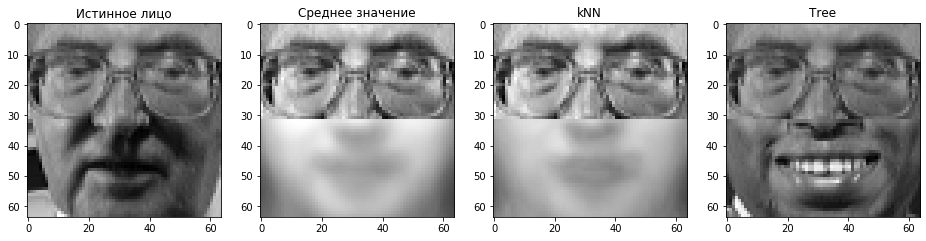

In [17]:
# Нарисуем случайную половину верха лица из теста и дополним его средним значением: 

n = np.random.randint(100)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(
    nrows=1, ncols=4,
    figsize=(16, 4)
)


view = np.hstack((X_test[n], y_test[n]))
ax1.imshow(view.reshape(64,64), cmap='gray')
ax1.set_title("Истинное лицо")

view = np.hstack((X_test[n], mean_bottom))
ax2.imshow(view.reshape(64,64), cmap='gray')
ax2.set_title('Среднее значение')

view = np.hstack((X_test[n], pred[n]))
ax3.imshow(view.reshape(64,64), cmap='gray')
ax3.set_title('kNN')


view = np.hstack((X_test[n], pred_tree[n]))
ax4.imshow(view.reshape(64,64), cmap='gray')
ax4.set_title('Tree')



plt.show()

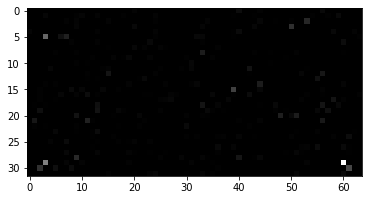

In [18]:
# Посмотрим карту наиболее Важных признаков
plt.imshow(tree.feature_importances_.reshape(32,64), cmap='gray')
plt.show()

Обратите внимание, на сколько хорошо получается рисовать лицо, но на сколько выросла ошибка - Дерево получилось слишком перееобученным

Обучите GridSearchCV для поиска оптимального сочетания параметров max_depth и min_samples_leaf на трех фолдах. В качестве метрики качества используйте туже среднеквадратическую ошибку (Обратите внимание на "Подвох" sklearn'a)  

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
tree = DecisionTreeRegressor(random_state=18)

params = { 
    'max_depth': range(1, 10),
    'min_samples_leaf': range(1,10)
         }

gcv = GridSearchCV(tree, params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
gcv.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:  5.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=18,
                                             splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_me

In [21]:
gcv.best_params_

{'max_depth': 3, 'min_samples_leaf': 9}

In [26]:
tree = DecisionTreeRegressor(random_state=18, max_depth=3, min_samples_leaf=9)
tree.fit(X_train, y_train)
pred_tree = tree.predict(X_test)

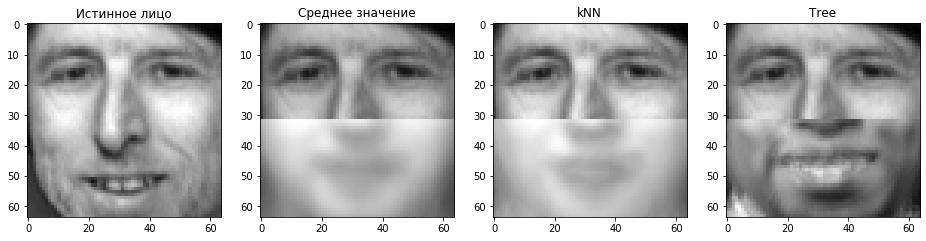

In [27]:
n = np.random.randint(100)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(
    nrows=1, ncols=4,
    figsize=(16, 4)
)


view = np.hstack((X_test[n], y_test[n]))
ax1.imshow(view.reshape(64,64), cmap='gray')
ax1.set_title("Истинное лицо")

view = np.hstack((X_test[n], mean_bottom))
ax2.imshow(view.reshape(64,64), cmap='gray')
ax2.set_title('Среднее значение')

view = np.hstack((X_test[n], pred[n]))
ax3.imshow(view.reshape(64,64), cmap='gray')
ax3.set_title('kNN')


view = np.hstack((X_test[n], pred_tree[n]))
ax4.imshow(view.reshape(64,64), cmap='gray')
ax4.set_title('Tree')



plt.show()